## Portfolio and Risk Management

This project is used as a tool to practice and apply methods I have learned about Portfolio and Risk Management. This project will be expanded on a rolling basis, mostly limited by how much time I have after school, etc... 
First we need to get some data.

In [1]:
## Imports

import matplotlib as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import yfinance as yf

In [2]:
## Tickers part of the portfolio
tickers = ['TSLA', 'GME', 'AMC' ,'MSFT', 'GOOG']

## How long in the past we want to look
start_date = datetime(2016, 1, 1)
end_date = datetime(2022, 1, 16)

## Get all the data from yahoo finance
portfolio = pd.concat([yf.download(tickers[tick], start = start_date,end = end_date).iloc[:,4] 
                       for tick in range(len(tickers))],axis = 1)

portfolio.columns = tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


The next step would be to check for completness of the data and familiarize yourself with the structure of the data.

In [3]:
portfolio.head()

,TSLA,GME,AMC,MSFT,GOOG
Date,,,,,
2016-01-04,44.681999,21.848804,17.572334,49.591049,741.840027
2016-01-05,44.686001,22.203815,17.777105,49.817299,742.580017
2016-01-06,43.807999,21.895107,17.595091,48.912354,743.619995
2016-01-07,43.130001,21.956852,17.155214,47.211048,726.390015
2016-01-08,42.200001,21.895107,16.973192,47.355839,714.469971


In [4]:
portfolio.describe()

,TSLA,GME,AMC,MSFT,GOOG
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,221.454803,40.280898,16.201018,135.963729,1336.691101
std,291.042571,63.279808,10.567634,80.806941,612.532663
min,28.733999,2.800000,1.980000,44.449959,668.260010
25%,50.310001,10.100000,9.489753,67.510147,930.390015
50%,65.820000,15.945117,13.260000,107.105698,1140.989990
75%,286.152008,22.180664,22.130539,200.470352,1485.930054
max,1229.910034,347.510010,62.549999,343.109985,3014.179932


In [5]:
portfolio.isnull().values.any()

False

It also seems to be helpful to plot the plot prices as a function of time. However, since some of the assets have largely different prices the scale might be affected.

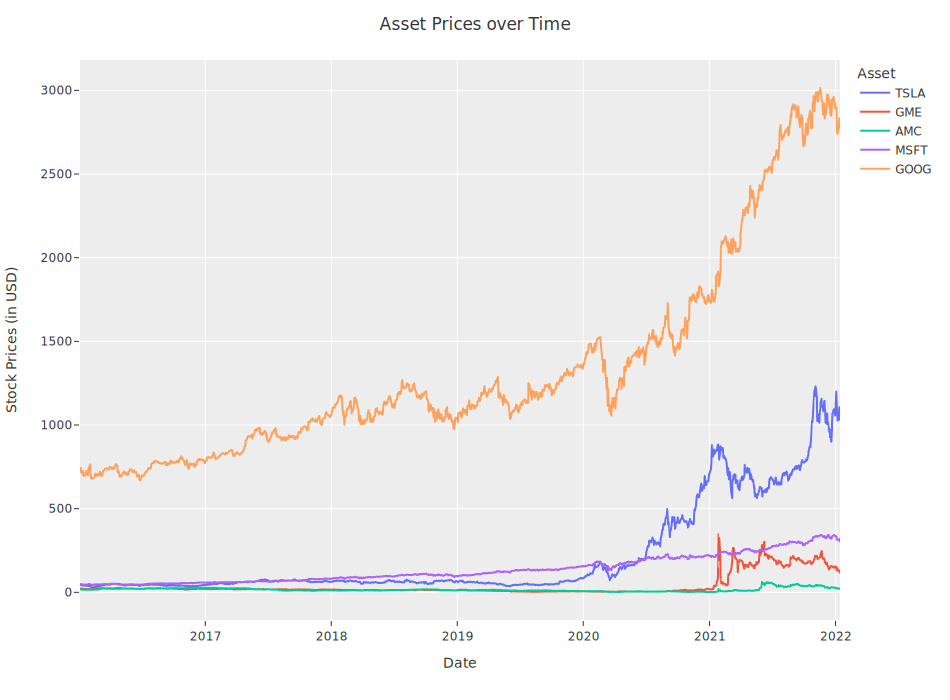

In [32]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = "svg"

fig = px.line(portfolio)

fig.update_layout(legend_title = "Asset", title = "Asset Prices over Time")
fig.update_xaxes(title = "Date")
fig.update_yaxes(title = "Stock Prices (in USD)")
fig.update_layout(width = 950, height = 700, title_x = 0.5, template = "ggplot2")

fig.show()

As expected, the scale suffers. Let's plot the cummulative returns. This should increase legibility of the plot.


In [34]:
asset_returns = portfolio.pct_change().dropna()

asset_returns.head()

,TSLA,GME,AMC,MSFT,GOOG
Date,,,,,
2016-01-05,0.000090,0.016249,0.011653,0.004562,0.000998
2016-01-06,-0.019648,-0.013903,-0.010239,-0.018165,0.001400
2016-01-07,-0.015477,0.002820,-0.025000,-0.034783,-0.023170
2016-01-08,-0.021563,-0.002812,-0.010610,0.003067,-0.016410
2016-01-11,-0.014929,0.035601,-0.004022,-0.000573,0.002184


In [45]:
asset_returns_cum = ((1+asset_returns).cumprod()-1) * 100

asset_returns_cum.head()

,TSLA,GME,AMC,MSFT,GOOG
Date,,,,,
2016-01-05,0.008956,1.624853,1.165304,0.456231,0.099751
2016-01-06,-1.956046,0.211924,0.129502,-1.368585,0.239940
2016-01-07,-3.473430,0.494524,-2.373731,-4.799255,-2.082661
2016-01-08,-5.554806,0.211924,-3.409576,-4.507286,-3.689482
2016-01-11,-6.964772,3.779559,-3.798018,-4.562024,-3.479186


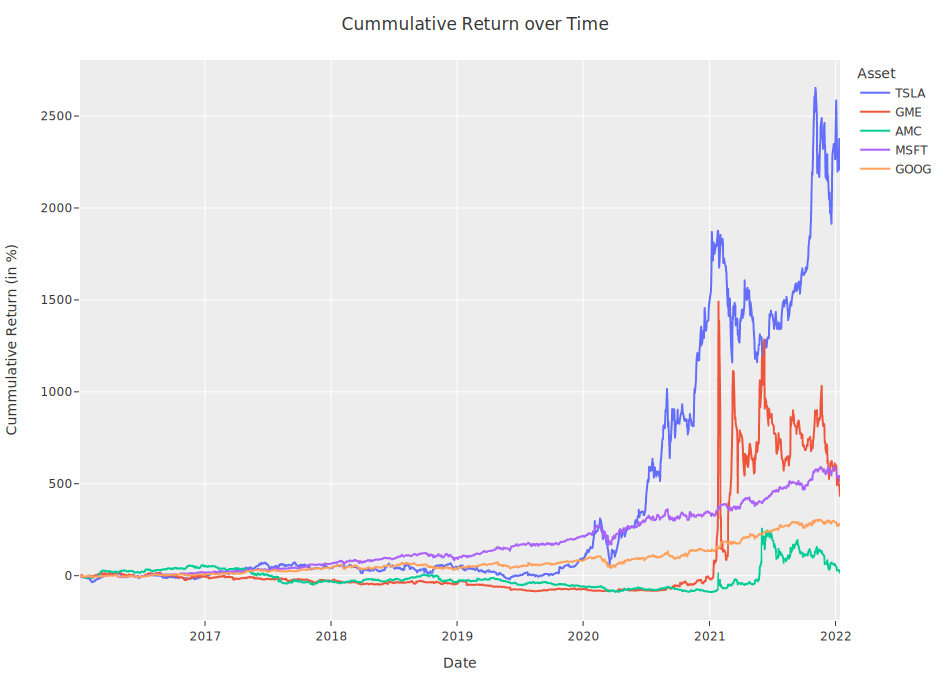

In [46]:
fig = px.line(asset_returns_cum)

fig.update_layout(legend_title = "Asset", title = "Cummulative Return over Time")
fig.update_xaxes(title = "Date")
fig.update_yaxes(title = "Cummulative Return (in %)")
fig.update_layout(width = 950, height = 700, title_x = 0.5, template = "ggplot2")

fig.show()

This plot helps a little more. From the first plot we would expect GOOG to be performing the best. However, this plot clearly shows that TSLA is blowing GOOG out of the water. As is GME, which seemed to be underperforming significantly when compared to GOOG. Let's take a closer look at the historical data of TSLA.

In [48]:
tsla_asset = portfolio['TSLA']
tsla_return = tsla_asset.pct_change().dropna() * 100

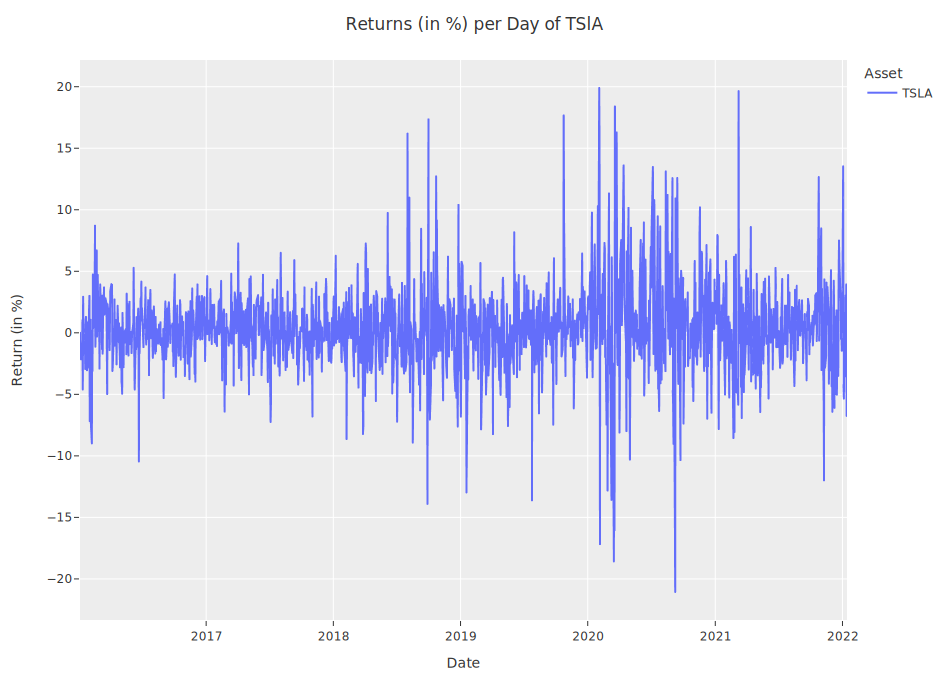

In [50]:
fig = px.line(tsla_return)
fig.update_layout(legend_title = "Asset", title = "Returns (in %) per Day of TSlA")
fig.update_xaxes(title = "Date")
fig.update_yaxes(title = "Return (in %)")
fig.update_layout(width = 950, height = 700, title_x = 0.5, template = "ggplot2")

fig.show()

From the return per day we can see that the beginning of 2020 was very eventful. This can be explained by the COVID-19 pandemic. Then, the recent visible increase in volatility can also explained by the fear caused by the COVID-19 omicron variant. Let's calculate volatility.

In [55]:
import math

tsla_daily_volatility = tsla_return.std()
print("The average daily volatility is", tsla_daily_volatility)

tsla_monthly_volatility = math.sqrt(21) * tsla_daily_volatility
print("The average monthly volatility is", tsla_monthly_volatility)

tsla_annual_volatility = math.sqrt(252) * tsla_monthly_volatility
print("The average annual volatility is", tsla_annual_volatility)

The average daily volatility is 3.625287137572878
The average monthly volatility is 16.613152723877498
The average annual volatility is 263.725623600691


From here it seems useful to take a look at the distribution of the returns as well as the VaR and cVaR.

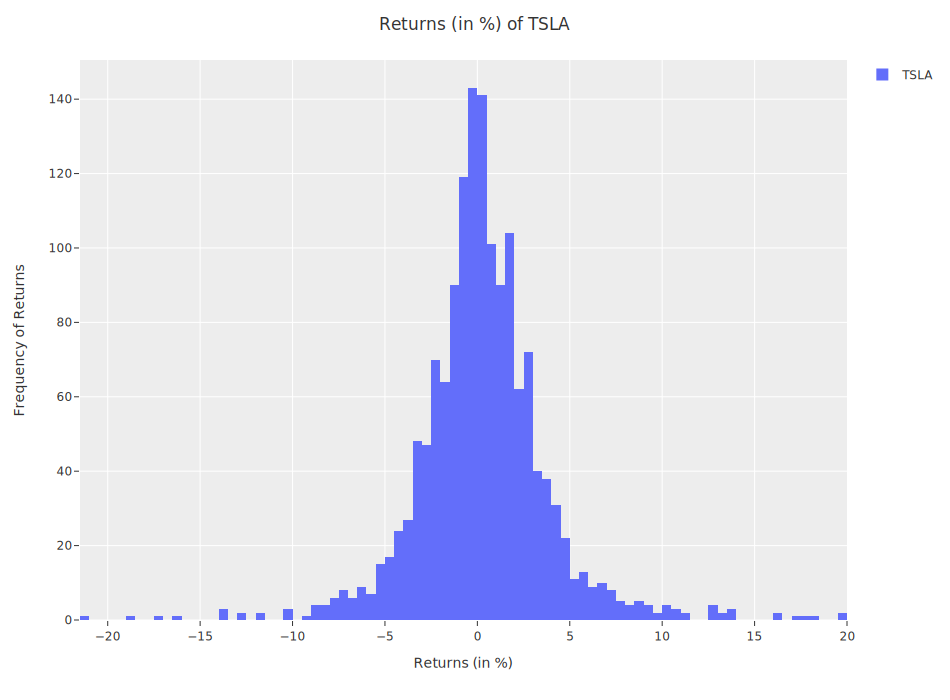

In [114]:
fig = px.histogram(tsla_return)
fig.update_layout(legend_title = "", title = "Returns (in %) of TSLA")
fig.update_xaxes(title = "Returns (in %)")
fig.update_yaxes(title = "Frequency of Returns")
fig.update_layout(width = 950, height = 700, title_x = 0.5, template = "ggplot2")

As can be seen, the returns are relatively normal distributed (possibly t-distribution). For now, we are going to assume a normal distribution:

In [115]:
## Calculate VaR(90) and CVaR(90)
var_90 = np.percentile(tsla_return, 10)
cvar_90 = tsla_return[tsla_return <= var_90].mean()

## Calculate VaR(95) and CVaR(95)
var_95 = np.percentile(tsla_return, 5)
cvar_95 = tsla_return[tsla_return <= var_95].mean()

## Calculate VaR(99) and CVaR(99)
var_99 = np.percentile(tsla_return, 1)
cvar_99 = tsla_return[tsla_return <= var_99].mean()


print("VaR(90):",var_90)
print("CVaR(90):", cvar_90)

print("")

print("VaR(90):",var_95)
print("CVaR(90):", cvar_95)

print("")

print("VaR(99):",var_99)
print("CVaR(99):", cvar_99)

VaR(90): -3.354413502899729
CVaR(90): -5.983841024719736

VaR(90): -4.977261277312514
CVaR(90): -7.902930921500541

VaR(99): -8.97442386966909
CVaR(99): -13.277236397085638


Let's add these values to the histogram!

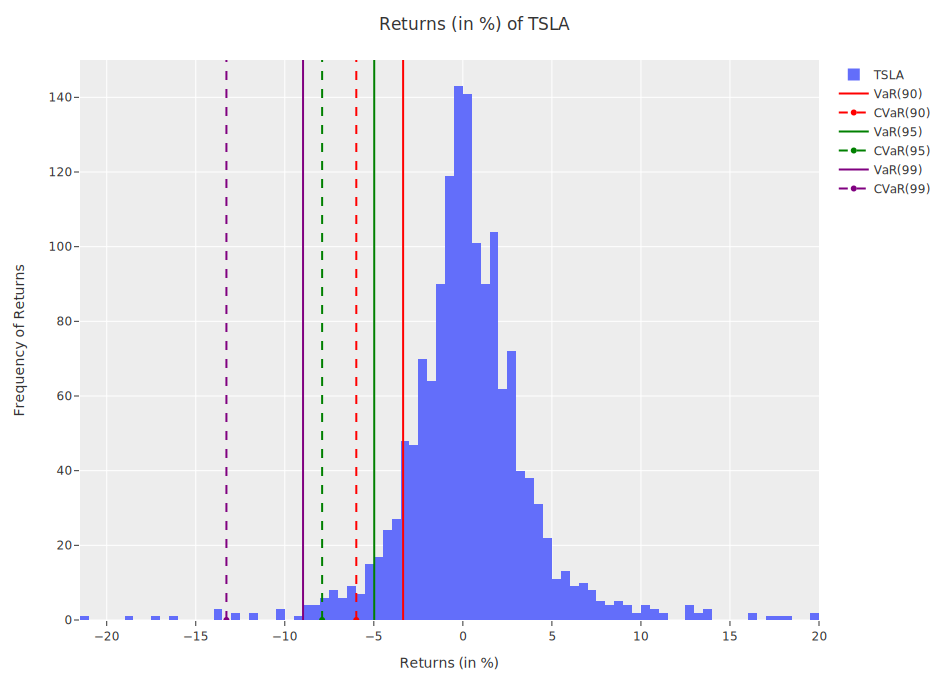

In [116]:
fig.update_yaxes(range = [0,150])

fig.add_trace(go.Scatter(x=(var_90,var_90), y = (0,200), mode = 'lines', line_color='Red', name = "VaR(90)"))
fig.add_trace(go.Scatter(x=(cvar_90,cvar_90),y = (0,200), line_dash='dash', line_color='Red',name = "CVaR(90)"))


fig.add_trace(go.Scatter(x=(var_95,var_95), y = (0,200), mode = 'lines', line_color='Green', name = "VaR(95)"))
fig.add_trace(go.Scatter(x=(cvar_95,cvar_95),y = (0,200), line_dash='dash', line_color='Green',name = "CVaR(95)"))

fig.add_trace(go.Scatter(x=(var_99,var_99), y = (0,200), mode = 'lines', line_color='Purple', name = "VaR(99)"))
fig.add_trace(go.Scatter(x=(cvar_99,cvar_99),y = (0,200), line_dash='dash', line_color='Purple',name = "CVaR(99)"))

fig.show()

Great, this plot is giving us a lot of information. Let's focus only on VaR(90). The value is telling us that (historically) there is a probability of 90 percent that the losses don't exceed -3.35%. If they do, there is a 90% probabilty the losses don't exceed 5.98%. This is an example of very simple and straight forward risk management. But before we dive into more detail only focusing on the TSLA assest, let's look at our whole portfolio.

## Best Suited Portfolio Weights - GMV and MSR

Let's determine the portfolio weights for the best valued portfolio and the portfolio with the least risk. Then we can continue with more risk analysis (future and historical).